## Radioactive Decay

Anthony Dawson 2020.ipynb

17/12/20

---

This programme describes the radioactive decay of a large number of atoms using the Monte Carlo technique, and then does the same for the daughter atoms. Following this the programme then describes the absorption of atoms by reactor shielding.

---


The radioactive decay formula:

$${N(t)} = {N_0}{e}^{-\lambda t}$$

Probability of decay is given by:

$${\lambda} = {ln}{(\frac{1}{1-p})}$$

The number of grandaughter atoms is calculated from the formula:

$$ {G(t)} = {N_0} - {N(t)} - {D(t)} $$


---

1. Create Monte Carlo Function part 1
2. Calculate the number of daughter atoms from simulation
3. Plot Populations of Parents and Daughters
4. Use np.interp to find time taken for N to half
5. Create Monte Carlo Function part 2
6. Calculate the number of daughter and grandaughter atoms from simulation
7. Plot Populations of Parents, Daughters and Grandaughters
8. Find the maximum daughter count
9. Find the time corresponding to the maximum daughter count
10. Find no. of layers to absorb 50% of neutrons emitted
11. Plot the number of of transmitted neutrons as shield thickness is varied
12. Use np.interp to find shield thickness count at 1%
13. Calculate fraction of of transmitted neutrons as shield thickness is varied
14. Plot fraction of transmitted neutrons as shield thickness is varied

Task 1: Simulate the radioactive decay of a large initial number of atoms (N0
at time t = 0), by using a random number to test whether or not an atom has
decayed in a time step. For the initial sample take the decay probability p = 0.05
per second (a 5% chance of decay in 1 second). For each time step, calculate N(t),
and also D(t), the number of daughter atoms (intially zero) and plot the results as
points. Estimate the half-life
from numerical experiment and compare it to the theoretical expectation

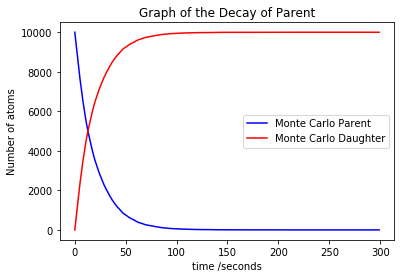

In [7]:
import numpy
%matplotlib inline
import matplotlib.pyplot as pyplot
import random

N0 = 10000                                        # Set the number of atoms 
t1 = 300                                          # Set the time duration
n_timepoints = 300                                # Set the the number of timepoints
p_decay_parent = 0.05                             # Set the probability of decay

# Create Monte Carlo Function 
def simulate_monte_carlo(N0, t1, n_timepoints):
    dt             = t1 / n_timepoints           # the interval between each time division
    count_parent   = numpy.zeros((n_timepoints)) # creating zero arrays to put the counts into
    atoms          = numpy.ones((N0))            # Create an array for the atoms
    for idx_time in range(n_timepoints):
        
        count_parent[idx_time]   = (atoms == 1).sum() #Counting how many atoms of each type remain in the interval
        
        for idx_atom in range(N0):
            
            if atoms[idx_atom] == 1:             # Probability test
                if random.random() <= p_decay_parent:
                    atoms[idx_atom] = 2
                else:
                    atoms[idx_atom] = 1
                
    return count_parent

timebase = numpy.arange(0, t1, t1/n_timepoints)   #creating the array of times for use
n_parent = simulate_monte_carlo(N0, t1, n_timepoints) #Calling the Monte Carlo Simulation   
n_daughter = (10000 - n_parent)                   # Calculate the number of daughter atoms from simulation

#Plotting
pyplot.figure()
pyplot.plot(timebase, n_parent, label = 'Monte Carlo Parent', color = 'blue')
pyplot.plot(timebase, n_daughter, label = 'Monte Carlo Daughter', color = 'red')
pyplot.title('Populations of Parents and Daughters')
pyplot.ylabel('Number of atoms')
pyplot.xlabel('time /seconds')
pyplot.legend(loc='center right') 
pyplot.show()

half-life will be indicated by the intersection of the two plots

Theoretical:


Decay Constant: $$ \lambda = ln (\frac{1}{1-p})$$

Half-Life: $$ T_{1/2} = \frac{ln2}{\lambda} $$

decay constant = 0.0513
half life = 13.5 seconds

In [18]:
N_half = N0/2
halves = numpy.interp(N_half, n_daughter, timebase)          # Use np.interp to find time taken for N to half 
print("The calculated half life is", halves, "seconds")

The calculated half life is 12.896678966789668 seconds


This is close to the expected value of 13.5 from the theoretical calculation

Task 2: the daughter species is also radioactive and decays
with p = 0.02 per second. Plot the mother, daughter and grandaughter species as
a function of time. Estimate the time at which the daughter population reaches a
peak.

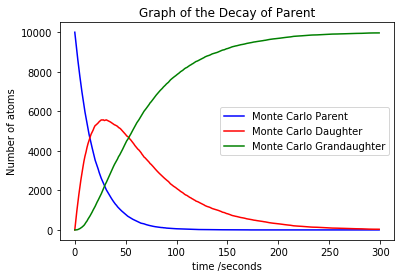

the peak daughter count:   5.57e+03
Time at max is:   2.80e+01 seconds


In [23]:
N0 = 10000                                        # Set the number of atoms 
t1 = 300                                          # Set the time duration
n_timepoints = 300                                # Set the the number of timepoints
p_decay_parent = 0.05                             # Set the probability of decay
p_decay_daughter = 0.02                           # Set the probability of decay
#Create Monte Carlo Function 
def simulate_monte_carlo_2(N0, t1, n_timepoints):
    dt             = t1 / n_timepoints           #Calculating the interval between each time division
    atoms          = numpy.ones((N0))            #Create an array for the atoms
    count_parent   = numpy.zeros((n_timepoints)) #creating zero arrays to put the counts into for parents
    count_daughter = numpy.zeros((n_timepoints)) #creating zero arrays to put the counts into for daughters
    
    for idx_time in range(n_timepoints):
        
        count_parent[idx_time]   = (atoms == 1).sum()  #Counting how many atoms of each type remain in the interval
        count_daughter[idx_time] = (atoms == 2).sum() 
        
        for idx_atom in range(N0):
            
            if atoms[idx_atom] == 1:                   #Deciding whether the given atom should decay
                if random.random() <= p_decay_parent:  #If random number is less than p_decay_parent
                    atoms[idx_atom] = 2                #Creates Daughter
                else:
                    atoms[idx_atom] = 1
            elif atoms[idx_atom] == 2:
                if random.random() <= p_decay_daughter: # If random number is less than p_decay_daughter
                    atoms[idx_atom] = 3                 # Creates Grandaughter
                else:
                    atoms[idx_atom] = 2
                
    return count_parent, count_daughter

timebase = numpy.arange(0, t1, t1/n_timepoints)                     #creating the array of times for use
n_parent, n_daughter = simulate_monte_carlo_2(N0, t1, n_timepoints) #Calling the Monte Carlo Simulation   
n_grandaughter = (10000 - (n_parent + n_daughter) )                 #Calculate the number of daughter and grandaughter atoms from simulation

#Plotting
pyplot.figure()
pyplot.plot(timebase, n_parent, label = 'Monte Carlo Parent', color = 'blue')
pyplot.plot(timebase, n_daughter, label = 'Monte Carlo Daughter', color = 'red')
pyplot.plot(timebase, n_grandaughter, label = 'Monte Carlo Grandaughter', color = 'green')

pyplot.title('Graph of the Decay of Parent')
pyplot.ylabel('Number of atoms')
pyplot.xlabel('time /seconds')
pyplot.legend(loc='center right') 
pyplot.show()

max_daughter = max(n_daughter)                # Find the maximum daughter count
max_timebase = timebase[n_daughter.argmax()]  # Find the time corresponding to the maximum daughter count
print("the peak daughter count: {0:10.2e}".format(max_daughter))
print("Time at max is: {0:10.2e} seconds".format(max_timebase))

Task 3: Estimate, by a Monte Carlo method, the value of B required to reduce the
exit flux of neutrons to 50% of the incident flux. Take the absorption probability, p
at each atom to be 3%. 

In [4]:
import random

N_0 = 1000

N = N_0

p = 0.03

B_0 = 0

B = B_0

while (N > 500):                      #End for loop when reduced exit flux to 50%
    for i in range(N):
        if random.random() < p:       #If random number is less 0.03
            N = N - 1                 #Neutron is absorbed
        
        else: 
            B = B+1                   #Else another layer is added      
        
print("The thickness of the shield in atoms is", B ,"for 1000 incident atoms") 

The thickness of the shield in atoms is 14882 for 1000 incident atoms


Task 4: calculate the fraction of transmitted neutrons
(those that do not get absorbed) as B is varied and then plot the number of
transmitted atoms versus B. Determine the value of B required to reduce the exit
flux of neutrons to 1% or less.

The shield thickness to allows 1% of neutrons through is 31637.0


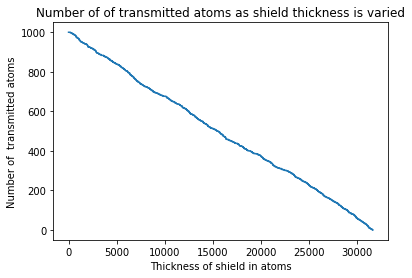

In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np

N_0 = 1000
N = N_0

p = 0.03

B_0 = 0
B = B_0

no_transmitted = []
B_array = []                                           

for i in range(N_0):
    for i in range(N):
        if random.random() < p:                        # If random number is less than 0.03
            N = N - 1                                  # Neutron is absorbed
        
        else: 
            B = B + 1                                  # Else another layer is added
        
        # Add these figures to lists
        no_transmitted.append(N)
        B_array.append(B)

# Plot the number of of transmitted neutrons as shield thickness is varied
plt.plot(B_array, no_transmitted)
plt.title('Number of of transmitted neutrons as shield thickness is varied')
plt.ylabel('Number of  transmitted neutrons')
plt.xlabel('Thickness of shield in atoms')

per = numpy.interp(10,no_transmitted, B_array)          # Use np.interp to find shield thickness count at 1%
print("The shield thickness to allow 1% of neutrons through is", per)

Text(0.5, 0, 'Thickness of shield in atoms')

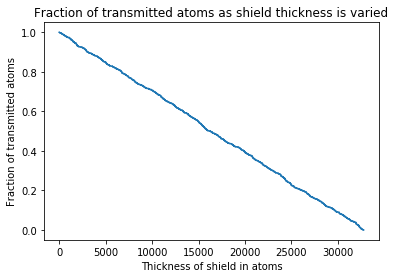

In [6]:
N_0 = 1000

# Calculate fraction of of transmitted neutrons as shield thickness is varied
Fraction_Transmitted = [i/N_0 for i in no_transmitted]

# Plot fraction of transmitted neutrons as shield thickness is varied
plt.plot(B_array, Fraction_Transmitted)
plt.title('Fraction of transmitted neutrons as shield thickness is varied')
plt.ylabel('Fraction of transmitted neutrons')
plt.xlabel('Thickness of shield in atoms')